In [1]:
# importing required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# loading the data set

dfz = pd.read_csv('Zoo.csv')


In [3]:
dfz.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
# Changing string variables to Labels 

from sklearn import preprocessing
le =preprocessing.LabelEncoder()
dfz['animal name']= le.fit_transform(np.array(dfz['animal name']))
dfz.shape

(101, 18)

In [5]:
# assigning data to dependnet and independent variables
array = dfz.values
X = array[:, 0:17]
Y = array[:, 17]
dfz.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


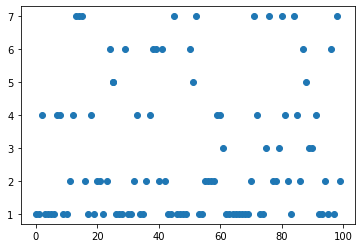

In [6]:
# checking for aniaml name and type
import matplotlib.pyplot as plt 
plt.scatter(dfz['animal name'], dfz['type'])

In [7]:
# assigning kfold for cross validation
kfold = KFold(n_splits=4)

In [8]:
# Creating model using KNN classifier 
# and fitting into cross validaton

model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, X, Y, cv=kfold)


In [9]:
# the result is nothing but efficieny which is very low
# it is because the animal name contains ery high unique values which is difficult to classify
# so we will remove animal names as the related data is already captured in other variable

print(results.mean())

0.20576923076923076


In [10]:
# leaving the animal name column and assigning the data
array = dfz.values
X = array[:, 1:17]
Y = array[:, 17]

In [11]:
# splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=7)

In [12]:
# aas the least populated class has only four values 
# we are restricting the divisiob=ns or splits to four only

kfold = KFold(n_splits=4)

In [35]:
# From the grid search from the later part it is evident that 3 nearesr neighbours is the ideal case
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, X_train, y_train, cv=kfold)


In [36]:
# the accuracy of the model is as follows
print(results.mean())

0.85


### Grid Search for Algorithm Tuning

In [15]:
# fine tuning the model with varius knn
from sklearn.model_selection import GridSearchCV

In [25]:
n_neighbors = np.array(range(2,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid 

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])}

In [26]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.93
{'n_neighbors': 3}


### Visualizing the CV results

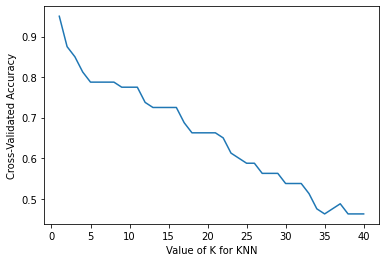

In [37]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kfold)
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [38]:
# finally fitting the data with knn =3
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, X_train, y_train, cv=kfold)


In [39]:
# fitting the data in the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# Accuracy is given as below
print(results.mean())

0.85


In [41]:
#predicting y by passing the test data
y_predict = model.predict(X_test)

In [45]:
# Creating confusion matrix for assesing the result
#from sklearn import metrics
#print(metrics.confusion_matrix(y_test,y_predict))

'''[[7 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]'''

'[[7 0 0 0 0 0]\n [0 5 0 0 0 0]\n [0 0 3 0 0 0]\n [0 0 0 2 0 0]\n [0 0 0 0 2 0]\n [0 0 0 0 0 2]]'

In [43]:
# looking at presdicted and actual result through cross tab
# seems like there are  no false positives or false negatives
pd.crosstab(y_test,y_predict)

col_0,1,2,4,5,6,7
row_0,,,,,,
1,7,0,0,0,0,0
2,0,5,0,0,0,0
4,0,0,3,0,0,0
5,0,0,0,2,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,2


In [44]:
# the accuracy is given below 

print(metrics.accuracy_score(y_test,y_predict))

1.0


# Glass

In [46]:
# Loading the required data from file
dfg = pd.read_csv('glass.csv')


In [47]:
# looking at the data
dfg.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [65]:
dfg.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [48]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [49]:
# converting and assigning the data to x and y
array = dfg.values
X = array[:, 0:9]
Y = array[:, 9]


In [50]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=7)

In [51]:
X= X_train
Y=y_train

In [52]:
# using ten fold split for cross validation
kfold = KFold(n_splits=10)


In [53]:
# fitting the model with knn 7 
model = KNeighborsClassifier(n_neighbors=7)
results = cross_val_score(model, X, Y, cv=kfold)


In [54]:
print(results.mean())

0.6715686274509804


### Grid Search for Algorithm Tuning

In [55]:
# grid searching for better knn value
from sklearn.model_selection import GridSearchCV

In [56]:
n_neighbors = np.array(range(2,40))
param_grid = dict(n_neighbors=n_neighbors)

In [57]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [58]:
# the best knn value is 4 as given by grid search
print(grid.best_score_)
print(grid.best_params_)

0.6956302521008404
{'n_neighbors': 4}


In [59]:
# fitting the model with knn n = 4
model = KNeighborsClassifier(n_neighbors=4)
results = cross_val_score(model, X, Y, cv=kfold)
model.fit(X, Y)

KNeighborsClassifier(n_neighbors=4)

In [60]:
# printing the result
print(results.mean())

0.7068627450980391


In [61]:
# predicting the y with test data 
y_predict = model.predict(X_test)

In [62]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_predict))

[[ 8  1  1  0  0  0]
 [ 9 10  1  1  1  0]
 [ 2  0  1  0  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  0  0  5]]


In [63]:
print(metrics.accuracy_score(y_test,y_predict))

0.5581395348837209


In [64]:
# looking at presdicted and actual result through cross tab
# seems like there are  some  false predictions
pd.crosstab(y_test,y_predict)

col_0,1.0,2.0,3.0,5.0,6.0,7.0
row_0,,,,,,
1.0,8,1,1,0,0,0
2.0,9,10,1,1,1,0
3.0,2,0,1,0,0,0
5.0,1,1,0,0,0,0
6.0,0,0,0,0,0,1
7.0,0,0,0,0,0,5


In [66]:
dfg.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
# from the above it is clear that the columns of Ba and fe are mostly 0s 
# let us see if removing these columns can increase the accuracy

In [67]:
# converting and assigning the data to x and y
array = dfg.values
X = array[:, 0:7]
Y = array[:, 9]


In [68]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=7)

In [69]:
X= X_train
Y=y_train

In [82]:
# using ten fold split for cross validation
kfold = KFold(n_splits=8)


In [83]:
# grid searcn=hing for best knn n
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39])})

In [84]:
print(grid.best_score_)
print(grid.best_params_)

0.689747899159664
{'n_neighbors': 5}


In [85]:
# fitting the model with knn 5 
model = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model, X, Y, cv=kfold)


In [86]:
# the accuracy is increased comparitively 
print(results.mean())

0.7077922077922079


In [88]:
# ----x----